In [1]:
%matplotlib inline

import networkx as nx
import numpy as np
import copy
import matplotlib
import matplotlib.pyplot as plt

from multiprocessing import Pool

In [2]:
def simulate(G, H, trialtime, thresh, infected):    
    results = np.zeros([trialtime])
    #redun_connections= np.ones([trialtime])
    #timetaken = np.zeros([trialtime])
    
    for t in range(trialtime):
        aware = set([])
        results[t] = len(infected)
        for node in infected:
            aware.update({n for n in H.neighbors(node)})
        temp = copy.deepcopy(aware)
        temp_infect = copy.deepcopy(infected)

        for node in temp:
            neighset = {n for n in G.neighbors(node)}

            if len(temp_infect.intersection(neighset)) >= thresh[node]*len(neighset) :
                infected.update({node})
            else: 
                infected = infected-{node}
    return results
    

In [3]:
def comm_network(G, n_swap):
    H = G.copy()
    H = nx.double_edge_swap(H, n_swap, max_tries=n_swap*len(G));
    return H

In [4]:
def powerlaw(D, lamb, p0):
    x = np.arange(1,D)
    x = np.asarray(x, dtype=float)
    x = x**(-lamb)
    x = x/x.sum(axis=0)*(1-p0)
    x = np.insert(x, 0, p0, axis=0)
    return x

In [ ]:
N = 100
D = N-1 #maximum degree
lamb = 1.9

S = 1
while S % 2 != 0:
    degree_seq = np.random.choice(np.arange(D), N, replace=True, p=powerlaw(D,lamb, 0.0))
    S = np.sum(degree_seq)
sigma =0.2

mu = 0.3

In [ ]:
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, node_size=10)

In [57]:
def go(mu, max_nswap):
    trialtime = 15

    sigma = 0.2
    thresh = np.random.normal(mu, sigma, len(G))

    finesse = int(max_nswap/3)
    results_finegrain = np.zeros([finesse,trialtime])
    trialnumber = 100
    
    for T in range(trialnumber):
        infected = set((np.where(thresh <= 0)[0]))

        for i in range(finesse):

            n_swap = int(float((i)/(finesse))*max_nswap)

            H = comm_network(G, n_swap)
            R = simulate(G, H, trialtime, thresh, copy.deepcopy(infected))
            results_finegrain[i] = R + results_finegrain[i]
           
    return results_finegrain/trialnumber/len(G)


In [7]:
def Go(mu):
    return go(mu, int(S*1.5))

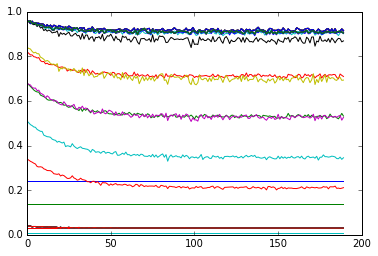

In [36]:
flip = infectionsize.T
finalsize = flip[len(flip)-1]
'''
rescaled = finalsize - np.average(finalsize[range(400,len(finalsize)-1)])
rescaled_cum = np.cumsum(rescaled)
int_curve = 1-rescaled_cum / rescaled_cum[len(rescaled_cum)-1]
plt.semilogy(int_curve,'b-')
plt.semilogy(rescaled, 'r-')
'''


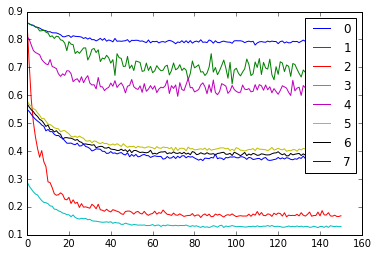

In [90]:
flip = results[7]
flip = flip.T
infectionsize = flip[14]
for a in range(8):
    plt.plot(((results[a]).T)[14], label='{}'.format(a))
plt.legend(loc='upper right')

In [ ]:
m, b = np.polyfit(np.arange(300), np.log(int_curve[range(300)]), 1)
print(m)

In [ ]:
plt.semilogy(np.exp(b)*np.exp(m*np.arange(300)), 'k-')
plt.semilogy(int_curve,'b--')

In [ ]:
np.save('power_1p9_N_100_trials_1000.npy', infectionsize)

In [ ]:
list(range(1,2))

In [ ]:
N = 100
D = N-1 #maximum degree
lamb = 2.3


S = 1
while S % 2 != 0:
    degree_seq = np.random.choice(np.arange(D), N, replace=True, p=powerlaw(D,lamb, 0.0))
    S = np.sum(degree_seq)

Gfull=nx.configuration_model(list(degree_seq))
G=nx.Graph(Gfull)
G.remove_edges_from(G.selfloop_edges())

S = np.sum(degree_seq)
def Go(mu):
    return go(mu, int(S*1.5))

pool= Pool()
results = pool.map(Go, list(0.2 + np.arange(8)/60))
np.save('varyR/power_2p3_N_100_trials_100.npy', results)

In [78]:
0.2 + np.arange(8)/60

array([ 0.2       ,  0.21666667,  0.23333333,  0.25      ,  0.26666667,
        0.28333333,  0.3       ,  0.31666667])

In [ ]:
N = 100
D = N-1 #maximum degree
lamb = 2.9


S = 1
while S % 2 != 0:
    degree_seq = np.random.choice(np.arange(D), N, replace=True, p=powerlaw(D,lamb, 0.0))
    S = np.sum(degree_seq)

Gfull=nx.configuration_model(list(degree_seq))
G=nx.Graph(Gfull)
G.remove_edges_from(G.selfloop_edges())

S = np.sum(degree_seq)
def Go(trialnumber):
    return go(trialnumber, int(S*1.5))

pool= Pool()
results = pool.map(Go, [250, 250, 250, 250])
infectionsize = np.asarray(sum(results), dtype=float)/4
#np.save('power_2p9_N_100_trials_1000.npy', infectionsize)

In [ ]:
N = 100
D = N-1 #maximum degree
lamb = 2.7


S = 1
while S % 2 != 0:
    degree_seq = np.random.choice(np.arange(D), N, replace=True, p=powerlaw(D,lamb, 0.0))
    S = np.sum(degree_seq)

Gfull=nx.configuration_model(list(degree_seq))
G=nx.Graph(Gfull)
G.remove_edges_from(G.selfloop_edges())

S = np.sum(degree_seq)
def Go(trialnumber):
    return go(trialnumber, int(S*1.5))

pool= Pool()
results = pool.map(Go, [250, 250, 250, 250])
infectionsize = np.asarray(sum(results), dtype=float)/4
np.save('power_2p7_N_100_trials_1000.npy', infectionsize)

In [ ]:
N = 100
D = N-1 #maximum degree
lamb = 2.3


S = 1
while S % 2 != 0:
    degree_seq = np.random.choice(np.arange(D), N, replace=True, p=powerlaw(D,lamb, 0.0))
    S = np.sum(degree_seq)

Gfull=nx.configuration_model(list(degree_seq))
G=nx.Graph(Gfull)
G.remove_edges_from(G.selfloop_edges())

S = np.sum(degree_seq)
def Go(trialnumber):
    return go(trialnumber, int(S*1.5))

pool= Pool()
results = pool.map(Go, [250, 250, 250, 250])
infectionsize = np.asarray(sum(results), dtype=float)/4
#np.save('power_2p3_N_100_trials_1000.npy', infectionsize)

In [ ]:
N = 100
D = N-1 #maximum degree
lamb = 2.1


S = 1
while S % 2 != 0:
    degree_seq = np.random.choice(np.arange(D), N, replace=True, p=powerlaw(D,lamb, 0.0))
    S = np.sum(degree_seq)

Gfull=nx.configuration_model(list(degree_seq))
G=nx.Graph(Gfull)
G.remove_edges_from(G.selfloop_edges())

S = np.sum(degree_seq)
def Go(trialnumber):
    return go(trialnumber, int(S*1.5))

pool= Pool()
results = pool.map(Go, [250, 250, 250, 250])
infectionsize = np.asarray(sum(results), dtype=float)/4
#np.save('power_2p1_N_100_trials_1000.npy', infectionsize)

In [ ]:
s = np.random.normal(0.3, 0.2, 1000)

In [ ]:
s

edge swap, R guass model, mu = 0.3 30x3x10 runs, 100 dots, max_nswap = 348

edge swap, R gauss model, mu = 0.25 30*3*10 runs, 100 dots, max_nswap = 356


node swap, R gauss model, mu = 0.25 30*3*20 runs, 50 dots, max_nswap = 550

In [6]:
def nodeswap(G, n_swap):
    H = G.copy()
    noodes = np.random.choice(np.arange(len(G)), n_swap, replace=False)
    for n in range(int(n_swap/2)):
        nodeA = noodes[2*n]
        nodeB = noodes[2*n+1]
        neighsetA = list(set(G.neighbors(nodeA))-{nodeB})
        neighsetB = list(set(G.neighbors(nodeB))-{nodeA})
        H.remove_edges_from(G.edges(nodeA))
        H.remove_edges_from(G.edges(nodeB))
        H.add_edges_from(zip([nodeA]*len(neighsetB), neighsetB))
        H.add_edges_from(zip([nodeB]*len(neighsetA), neighsetA))
        if nodeB in set(G.neighbors(nodeA)):
            H.add_edge(nodeA, nodeB)
    return H

In [8]:
N = 100
D = N-1 #maximum degree
lamb = 2.5

np.random.seed(0)
S = 1
while S % 2 != 0:
    degree_seq = np.random.choice(np.arange(D), N, replace=True, p=powerlaw(D,lamb, 0.0))
    S = np.sum(degree_seq)

Gfull=nx.configuration_model(list(degree_seq))
G=nx.Graph(Gfull)
G.remove_edges_from(G.selfloop_edges())

S = np.sum(degree_seq)

mu=0.25
sigma=0.2
max_nswap=int(S*2.5)
print(max_nswap)

550


In [12]:
finesse = 50
trialtime = 15
def go(trialnumber):
    
    results = np.zeros([finesse, trialtime])
    for T  in range(trialnumber):
        H = G.copy()
        thresh = np.random.normal(mu, sigma, N)
        infected = set((np.where(thresh <= 0)[0]))
        
        for n in range(finesse):
            H = nodeswap(H, 4)
            #H = nx.double_edge_swap(H, int(max_nswap/finesse), max_tries=max_nswap*N);
            results[n] = results[n]  + simulate(G, H, trialtime, thresh, copy.deepcopy(infected))

    return results/trialnumber

filename = 'power_power/node_swap_g2.1_mu025_N100.npy'
np.save(filename, np.zeros([finesse, trialtime]))
membuff=30
ind = 20
for savetomem in range(membuff):
    pool= Pool()
    results_new = pool.map(go, [ind, ind, ind])
    results = np.load(filename) + np.asarray(sum(results_new), dtype=float)/3
    np.save(filename, results)

np.save(filename, np.load(filename)/membuff)

In [13]:
results

array([[  312. ,   637.5,   903. ,  1138.5,  1314. ,  1429.5,  1521. ,
         1555.5,  1569. ,  1572. ,  1575. ,  1575. ,  1575. ,  1575. ,
         1575. ],
       [  312. ,   616.5,   864. ,  1087.5,  1239. ,  1335. ,  1389. ,
         1416. ,  1425. ,  1426.5,  1426.5,  1426.5,  1426.5,  1426.5,
         1426.5],
       [  312. ,   582. ,   817.5,  1036.5,  1168.5,  1255.5,  1297.5,
         1326. ,  1335. ,  1338. ,  1338. ,  1338. ,  1338. ,  1338. ,
         1338. ],
       [  312. ,   564. ,   778.5,   978. ,  1110. ,  1192.5,  1230. ,
         1267.5,  1278. ,  1281. ,  1281. ,  1281. ,  1281. ,  1281. ,
         1281. ],
       [  312. ,   553.5,   754.5,   951. ,  1080. ,  1158. ,  1200. ,
         1242. ,  1255.5,  1258.5,  1258.5,  1258.5,  1258.5,  1258.5,
         1258.5],
       [  312. ,   546. ,   735. ,   915. ,  1026. ,  1099.5,  1140. ,
         1180.5,  1192.5,  1195.5,  1195.5,  1195.5,  1195.5,  1195.5,
         1195.5],
       [  312. ,   535.5,   720. ,   876

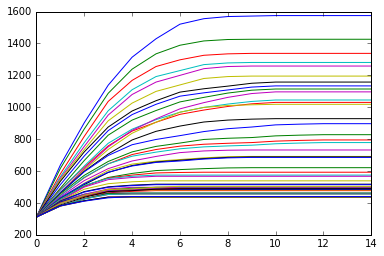

In [14]:
for r in range(len(results)):
    plt.plot(results[r])

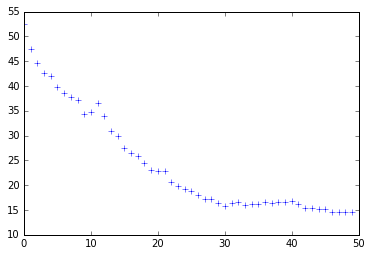

In [15]:
plt.plot((results.T)[14]/30, 'b+')

In [40]:
print(max_nswap)

348
